In [1]:
from model.model import *
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns


In [2]:

N=1000
CP_loc='inputs\CP_locs.csv'
POI_file = 'inputs/POIs.csv'
model = EVSpaceModel(CP_loc=CP_loc,POIs=POI_file)
model.run_model(100)   

{'output': {'output_dir': 'data//', 'model_reporters': {'av_charge': 'av_charge', 'completed_trip': 'completed_trip', 'dead_cars': 'dead_cars'}, 'agent_reporters': {'charge': 'charge', 'last_location': 'last_location', 'next_location': 'next_location', 'pos': 'pos'}}, 'model_params': {'start_date': '2022-01-01', 'width': 10.0, 'height': 10.0, 'model_name': 0, 'tol': 0.01, 'POI_file': 'None'}, 'agent_params': {'EVs': {'Type': 'CP', 'from_file': False, 'num_agents': 100, 'discharge_rate': 0.01, 'MoveType': 'loc', 'charging': False, 'max_range': 1, 'speed': 0.2}, 'Grid_Points': {'Type': 'GP', 'grid_spacing': 20, 'cars_passing': 0}, 'Charge_Points': {'Type': 'CP', 'CP_loc': 'random', 'CP_capacity': 10, 'N_Charge': 10, 'charge_rate': 0.2, 'cars_charging': 0, 'full': False}}}


In [3]:
# model.POIs.sort_values('prob')

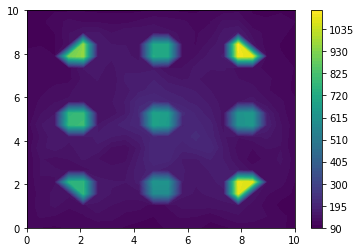

In [5]:
GP = model.datacollector_gridpoints.get_agent_vars_dataframe()
# XY = pd.DataFrame(GP['pos'].tolist()).rename({0:'X',1:'Y'},axis=1)

grid_spacing = model.cfg['agent_params']['Grid_Points']['grid_spacing']

GP_tot = GP.reset_index().groupby('AgentID').agg({'cars_passing':sum,'X':'first','Y':'first'})
# fig, ax = plt.subplots()
# sns.scatterplot(data=GP_tot, x='X',y='Y',c=GP_tot['cars_passing'])

X = GP_tot['X'].values.reshape((-1,grid_spacing))
Y = GP_tot['Y'].values.reshape((-1,grid_spacing))
Z = GP_tot['cars_passing'].values.reshape((-1,grid_spacing))

fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cs = ax.contourf(X, Y, Z, 100)
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cbar = plt.colorbar(cs)
